**<center><font size="4.2">Classification of Legit/Normal and Cyber-Attack/Abnormal Network Connection b/w Two Computers</font></center>**

<font size="2.5">Created By: Muhammad Abdullah  
GitHub: https://github.com/SouthernGhost/  
Email: m.abdullah.ab26@gmail.com  
Contact# 03191918669</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
#Read the data file
df = pd.read_csv('dataset_RA.csv')

In [3]:
#Print features/columns in the dataframe
print(f"Number of features in the data are: {len(df.columns)}")
df.columns

Number of features in the data are: 44


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome', 'level', 'label'],
      dtype='object')

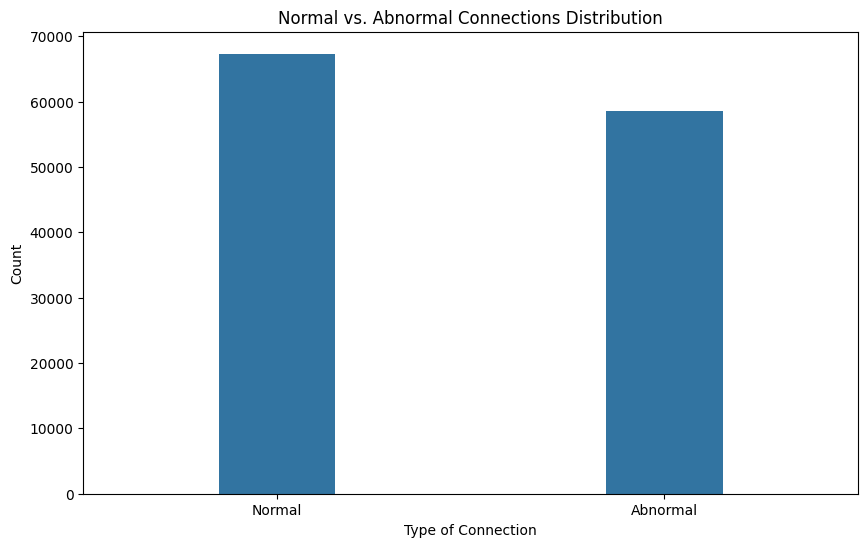

In [4]:
#Plotting a histogram for visualization of normal and abnormal connections
counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, width=0.3)
plt.title('Normal vs. Abnormal Connections Distribution')
plt.xlabel('Type of Connection')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,label
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [6]:
#Sorting the data by values of label column
df.sort_values(by=['label'],ascending=True,inplace=True)
df.reset_index(inplace=True)
df.head()

,index,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,label
0,0,0,udp,other,SF,146,0,0,0,0,...,0.6,0.88,0.00,0.00,0.00,0.0,0.0,normal,15,0
1,71440,0,tcp,http,SF,297,1359,0,0,0,...,0.0,0.11,0.05,0.11,0.01,0.0,0.0,normal,20,0
2,71438,0,tcp,http,SF,243,660,0,0,0,...,0.0,0.06,0.02,0.06,0.00,0.0,0.0,normal,18,0
3,71436,0,tcp,http,SF,237,375,0,0,0,...,0.0,0.01,0.02,0.00,0.00,0.0,0.0,normal,21,0
4,71435,0,udp,other,SF,516,4,0,0,0,...,0.0,1.00,0.00,0.00,0.00,0.0,0.0,normal,17,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        125972 non-null  int64  
 1   duration                     125972 non-null  int64  
 2   protocol_type                125972 non-null  object 
 3   service                      125972 non-null  object 
 4   flag                         125972 non-null  object 
 5   src_bytes                    125972 non-null  int64  
 6   dst_bytes                    125972 non-null  int64  
 7   land                         125972 non-null  int64  
 8   wrong_fragment               125972 non-null  int64  
 9   urgent                       125972 non-null  int64  
 10  hot                          125972 non-null  int64  
 11  num_failed_logins            125972 non-null  int64  
 12  logged_in                    125972 non-null  int64  
 13 

<font size="4">One-Hot Encoding of Categorical Columns</font>

In [8]:
#pd.set_option('future.no_silent_downcasting', True)
for cols in df.columns:
    if df[cols].dtype=='object':
        map = dict(zip(df[cols].unique(),list(range(len(df[cols].unique())))))
        df[cols]=df[cols].replace(map).astype(int)
df.info()        

C:\Users\Ghost\AppData\Local\Temp\ipykernel_960\2607552348.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace(map).astype(int)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_960\2607552348.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace(map).astype(int)
C:\Users\Ghost\AppData\Local\Temp\ipykernel_960\2607552348.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        125972 non-null  int64  
 1   duration                     125972 non-null  int64  
 2   protocol_type                125972 non-null  int32  
 3   service                      125972 non-null  int32  
 4   flag                         125972 non-null  int32  
 5   src_bytes                    125972 non-null  int64  
 6   dst_bytes                    125972 non-null  int64  
 7   land                         125972 non-null  int64  
 8   wrong_fragment               125972 non-null  int64  
 9   urgent                       125972 non-null  int64  
 10  hot                          125972 non-null  int64  
 11  num_failed_logins            125972 non-null  int64  
 12  logged_in                    125972 non-null  int64  
 13 

C:\Users\Ghost\AppData\Local\Temp\ipykernel_960\2607552348.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace(map).astype(int)


<font size="4">Split The Data by Test-Train Ratio</font>

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop(labels='label',axis=1)
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=10)
print(f"Training samples: {x_train.shape}\n")
print(f"Testing samples: {x_test.shape}\n")

Training samples: (88180, 44)

Testing samples: (37792, 44)



<font size='4'>Using A Random Forest Classifier For Preliminary Resutls and Understanding  
Also Gives An Insight into Feature Importances</font>

<font size="3">This initial Random Forest model is to understand the feature importances and training parameters</font>

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20188
           1       1.00      1.00      1.00     17604

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



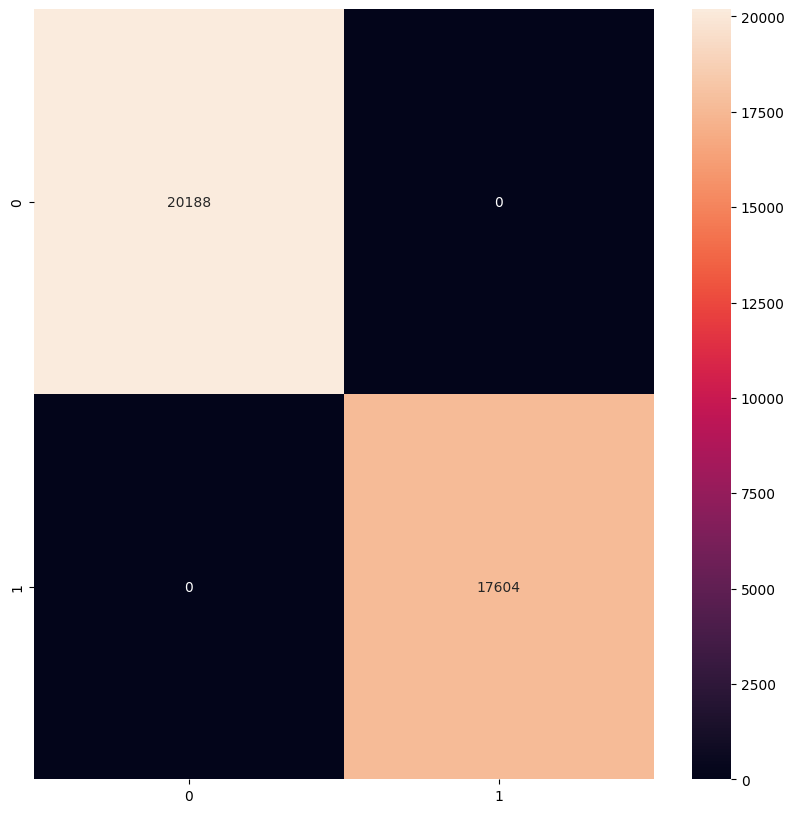

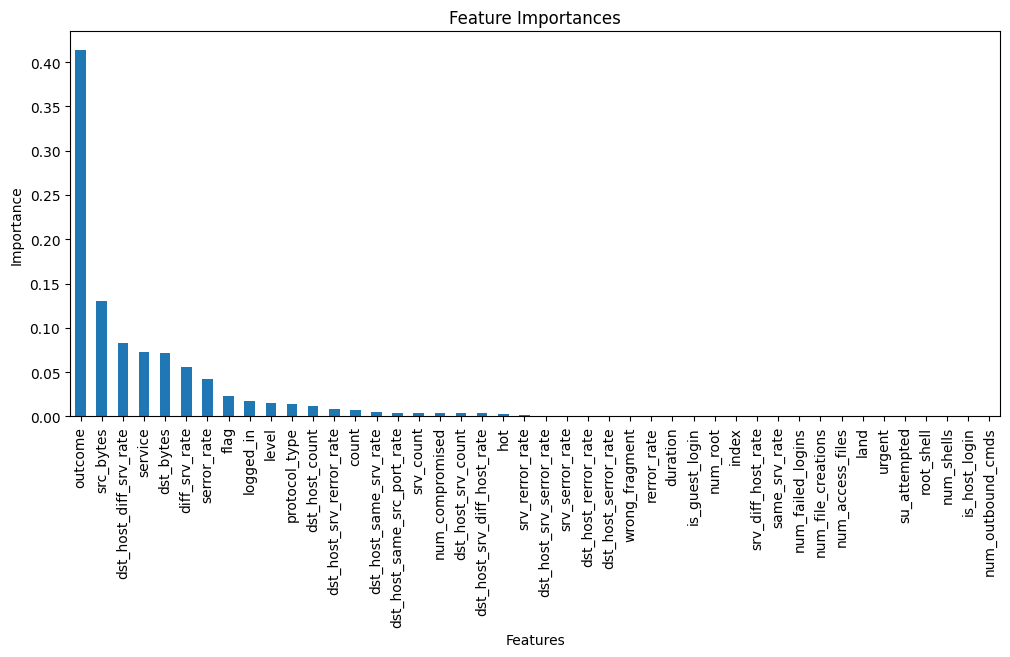

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Declare the model
rf_class = RandomForestClassifier(n_estimators=12,random_state=10,n_jobs=-1)
rf_class.fit(x_train,y_train)
y_pred = rf_class.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred,zero_division=1))

#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred,normalize=None)
plt.figure(figsize=(10,10))
f = sns.heatmap(cm, annot=True,fmt='d')
plt.show()

#Plot the feature importances
ft_imp = pd.DataFrame(data=rf_class.feature_importances_,index=(df.columns.drop('label')))
ft_imp.columns=['importance']
ft_imp.sort_values(by='importance',ascending=False,axis=0,inplace=True)
ft_imp.plot(kind='bar',figsize=(12,5),legend=False)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [11]:
#Print the list of labels in the order of their importance
ft_imp.index

Index(['outcome', 'src_bytes', 'dst_host_diff_srv_rate', 'service',
       'dst_bytes', 'diff_srv_rate', 'serror_rate', 'flag', 'logged_in',
       'level', 'protocol_type', 'dst_host_count', 'dst_host_srv_rerror_rate',
       'count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'srv_count', 'num_compromised', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'hot', 'srv_rerror_rate',
       'dst_host_srv_serror_rate', 'srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_serror_rate', 'wrong_fragment', 'rerror_rate', 'duration',
       'is_guest_login', 'num_root', 'index', 'srv_diff_host_rate',
       'same_srv_rate', 'num_failed_logins', 'num_file_creations',
       'num_access_files', 'land', 'urgent', 'su_attempted', 'root_shell',
       'num_shells', 'is_host_login', 'num_outbound_cmds'],
      dtype='object')

<font size="4">Drop The Lables That Have Minimal to No Impact on Model Performance</font>

In [12]:
drop_lbls = ['service', 'diff_srv_rate', 'dst_bytes', 'count', 'flag', 'logged_in',
       'dst_host_srv_count', 'level', 'dst_host_same_src_port_rate',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'rerror_rate', 'serror_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_rerror_rate', 'srv_count', 'num_compromised',
       'dst_host_srv_serror_rate', 'hot', 'dst_host_rerror_rate',
       'srv_serror_rate', 'protocol_type', 'duration', 'srv_rerror_rate',
       'same_srv_rate', 'wrong_fragment', 'index', 'srv_diff_host_rate',
       'is_guest_login', 'num_file_creations', 'num_root', 'land',
       'root_shell', 'num_access_files', 'is_host_login', 'num_outbound_cmds',
       'num_shells', 'su_attempted', 'num_failed_logins', 'urgent']

df.drop(labels=drop_lbls,axis=1,inplace=True)

In [13]:
#Split the training data after droping insignificant features
x=df.drop(labels='label',axis=1)
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=10)
print(f"Training samples: {x_train.shape}\n")
print(f"Testing samples: {x_test.shape}\n")

Training samples: (88180, 3)

Testing samples: (37792, 3)



<font size="3">Tuned Random Forest Binary Classifier</font>

Accuracy: 98.17

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20188
           1       1.00      0.96      0.98     17604

    accuracy                           0.98     37792
   macro avg       0.98      0.98      0.98     37792
weighted avg       0.98      0.98      0.98     37792



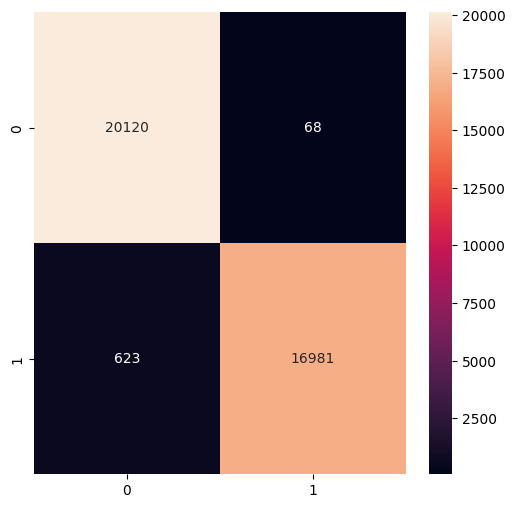

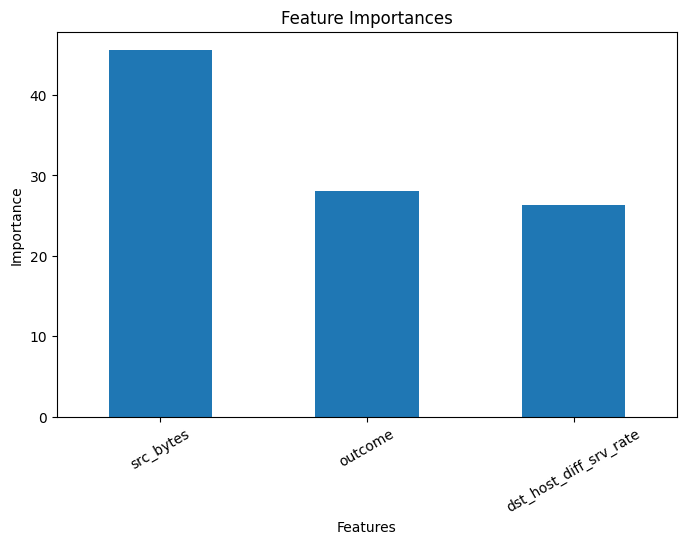

['random_forest_bin_classifier.pkl']

In [54]:
rf_class2 = RandomForestClassifier(n_estimators=11,random_state=10,n_jobs=-1, max_depth=2, max_features='log2')
rf_class2.fit(x_train,y_train)
y_pred = rf_class2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {np.round(accuracy*100,decimals=2)}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred,zero_division=1))

#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred,normalize=None)
plt.figure(figsize=(6,6))
f = sns.heatmap(cm, annot=True,fmt='d')
plt.show()

#Plot the feature importances
ft_imp = pd.DataFrame(data=np.round(100*rf_class2.feature_importances_,decimals=2),index=(df.columns.drop('label')))
ft_imp.columns=['importance']
ft_imp.sort_values(by='importance',ascending=False,axis=0,inplace=True)
ft_imp.plot(kind='bar',figsize=(8,5),legend=False)
plt.xlabel('Features')
plt.xticks(rotation=30)
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#Save the model to local disk
joblib.dump(rf_class2,'random_forest_bin_classifier.pkl')

Accuracy: 98.82

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20188
           1       0.98      1.00      0.99     17604

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



c:\Users\Ghost\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


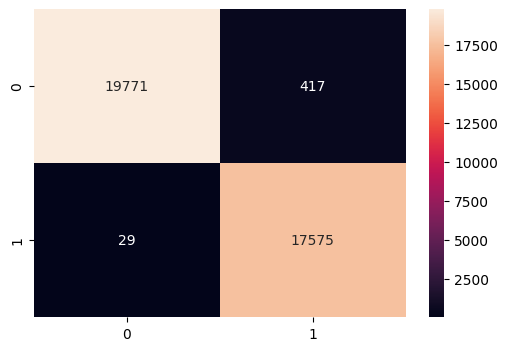

In [53]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(32,8),activation='relu',solver='adam',learning_rate='adaptive',max_iter=20,validation_fraction=0.2,
                        random_state=10)
ann.fit(x_train,y_train)
y_pred = ann.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {np.round(100*accuracy,decimals=2)}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred,zero_division=1))

cm = confusion_matrix(y_test, y_pred,normalize=None)
plt.figure(figsize=(6,4))
f = sns.heatmap(cm, annot=True,fmt='d')
plt.show()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [17]:
x_train.shape

(88180, 3)

In [26]:
ann = Sequential()
ann.add(Dense(64,input_shape=(x_train.shape[0],x_train.shape[1]),activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(16,activation='relu'))
ann.add(Dense(2,activation='relu'))

ann.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=10,batch_size=8)



Epoch 1/10


c:\Users\Ghost\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 3), dtype=float32). Expected shape (None, 88180, 3), but input has incompatible shape (None, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 3), dtype=float32)
  • training=True
  • mask=None